In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from numpy.f2py.cfuncs import includes

warnings.filterwarnings('ignore')

In [2]:
netflix_data_pdf = pd.read_parquet("C:\\Users\\saigi\\PycharmProjects\\PySpark_Project\\target_data")
netflix_data_pdf.head()

,show_id,type,title,director,cast,date_added,release_year,rating,movie_duration,seasons,...,released_countries,released_languages,movie_type,show_type,genres,added_date,year,month,day,day_of_week
0,s3435,Movie,The Influence,Dennis Rovira van Boekholt,"Manuela Vellés, Maggie Civantos, Alain Hernánd...","October 11, 2019",2019,TV-MA,102.0,NaN,...,"[Spain, France]","[Spanish, French]",Global,None,"[Horror Movies, International Movies]",2019-10-11,2019,October,11,Friday
1,s4067,Movie,Your Son,Miguel Ángel Vivas,"José Coronado, Ana Wagener, Asia Ortega, Pol M...","March 1, 2019",2018,TV-MA,103.0,NaN,...,"[Spain, France]","[Spanish, French]",Global,None,"[Dramas, International Movies, Thrillers]",2019-03-01,2019,March,1,Friday
2,s4068,Movie,Quién te cantará,Carlos Vermut,"Najwa Nimri, Eva Llorach, Carme Elias, Natalia...","February 28, 2019",2018,TV-MA,125.0,NaN,...,"[Spain, France]","[Spanish, French]",Global,None,"[Dramas, Independent Movies, International Mov...",2019-02-28,2019,February,28,Thursday
3,s4468,Movie,Gun City,Dani de la Torre,"Luis Tosar, Michelle Jenner, Vicente Romero, M...","October 31, 2018",2018,TV-MA,126.0,NaN,...,"[Spain, France]","[Spanish, French]",Global,None,"[Dramas, International Movies, Thrillers]",2018-10-31,2018,October,31,Wednesday
4,s4513,Movie,Errementari: The Blacksmith and the Devil,Paul Urkijo Alijo,"Kandido Uranga, Uma Bracaglia, Eneko Sagardoy,...","October 12, 2018",2018,TV-MA,99.0,NaN,...,"[Spain, France]","[Spanish, French]",Global,None,"[Horror Movies, International Movies, Sci-Fi &...",2018-10-12,2018,October,12,Friday


In [3]:
netflix_data_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7472 entries, 0 to 7471
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   show_id             7472 non-null   object 
 1   type                7472 non-null   object 
 2   title               7472 non-null   object 
 3   director            7472 non-null   object 
 4   cast                7472 non-null   object 
 5   date_added          7472 non-null   object 
 6   release_year        7472 non-null   int32  
 7   rating              7472 non-null   object 
 8   movie_duration      5421 non-null   float64
 9   seasons             2051 non-null   float64
 10  description         7472 non-null   object 
 11  released_countries  7472 non-null   object 
 12  released_languages  7472 non-null   object 
 13  movie_type          5421 non-null   object 
 14  show_type           2051 non-null   object 
 15  genres              7472 non-null   object 
 16  added_

In [4]:
netflix_data_pdf.describe()

,release_year,movie_duration,seasons
count,7472.000000,5421.000000,2051.000000
mean,2013.801526,101.060505,1.837640
std,9.060429,26.941902,1.630343
min,1942.000000,3.000000,1.000000
25%,2013.000000,88.000000,1.000000
50%,2017.000000,99.000000,1.000000
75%,2019.000000,115.000000,2.000000
max,2021.000000,312.000000,17.000000


In [5]:
netflix_data_pdf['type'].value_counts()

type
Movie      5421
TV Show    2051
Name: count, dtype: int64

In [6]:
netflix_data_pdf['rating'].value_counts()

rating
TV-MA       2721
TV-14       1835
R            752
TV-PG        689
PG-13        473
PG           278
TV-Y7        229
TV-Y         205
TV-G         164
NR            74
G             41
TV-Y7-FV       5
UR             3
NC-17          3
Name: count, dtype: int64

In [7]:
netflix_data_pdf['movie_type'].value_counts()

movie_type
Local     2987
Global    2434
Name: count, dtype: int64

In [8]:
netflix_data_pdf['show_type'].value_counts()

show_type
Local     1045
Global    1006
Name: count, dtype: int64

In [9]:
numerical_cols = []
categorical_cols = []
for col in netflix_data_pdf.columns:
    if netflix_data_pdf[col].dtype == object:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)
print(f"Number of categorical columns: {len(categorical_cols)}")
print(categorical_cols)
print(f"Number of numerical columns: {len(numerical_cols)}")
print(numerical_cols)

Number of categorical columns: 18
['show_id', 'type', 'title', 'director', 'cast', 'date_added', 'rating', 'description', 'released_countries', 'released_languages', 'movie_type', 'show_type', 'genres', 'added_date', 'year', 'month', 'day', 'day_of_week']
Number of numerical columns: 3
['release_year', 'movie_duration', 'seasons']


# **Univariate Analysis (Exploring Individual Features)**

## **Numerical Columns**

### **Release Year**

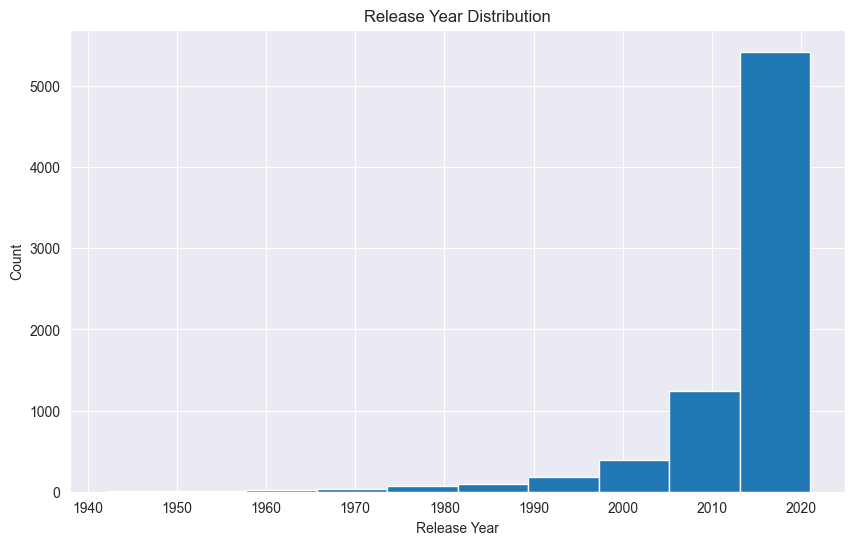

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(netflix_data_pdf['release_year'])
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Release Year Distribution')
plt.show()

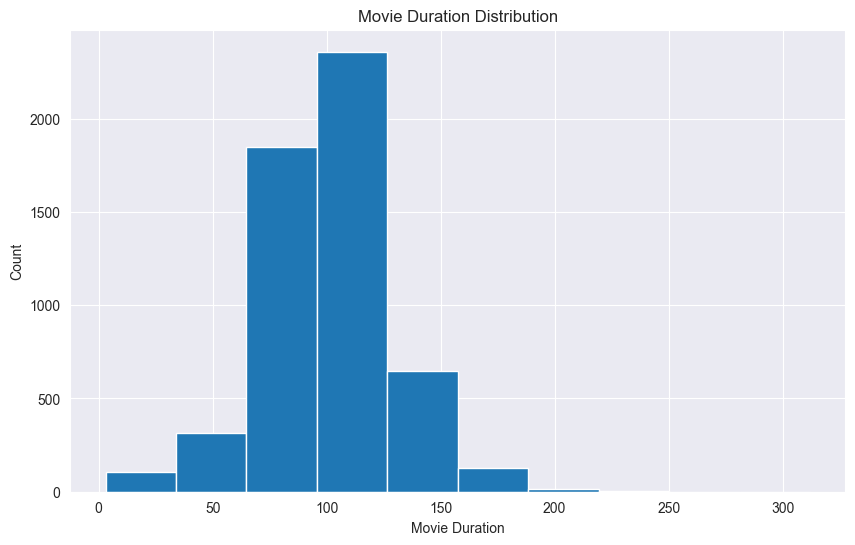

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(netflix_data_pdf['movie_duration'])
plt.xlabel('Movie Duration')
plt.ylabel('Count')
plt.title('Movie Duration Distribution')
plt.show()

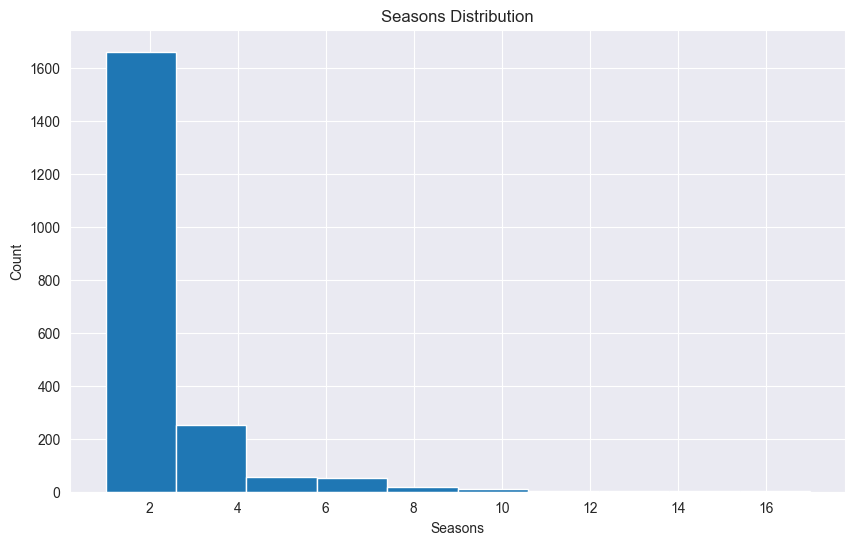

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(netflix_data_pdf['seasons'])
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Seasons Distribution')
plt.show()

## **Categorical Variables**

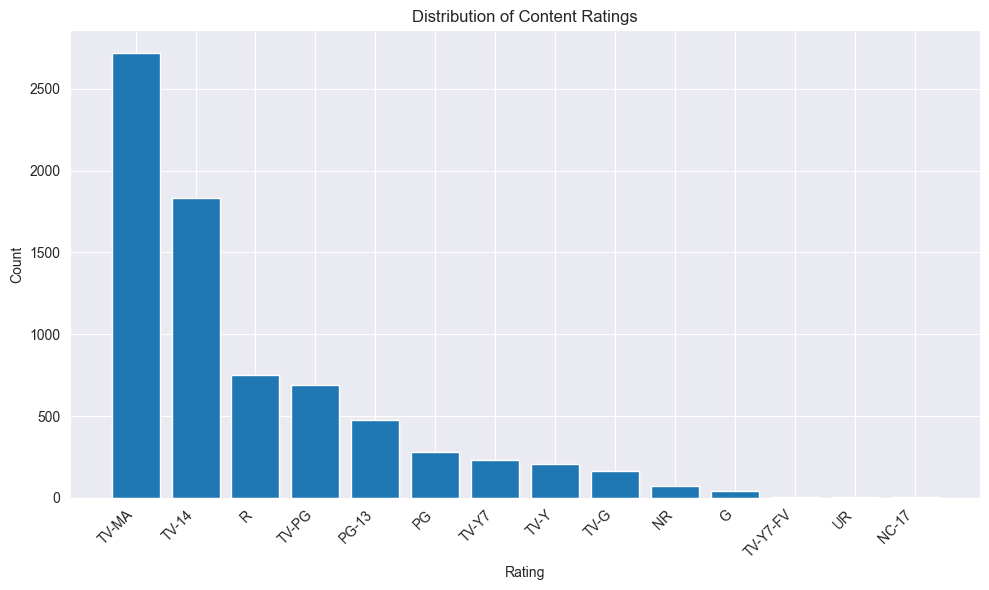

In [13]:
# Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(netflix_data_pdf["rating"].value_counts().index, netflix_data_pdf["rating"].value_counts().values)
plt.title("Distribution of Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

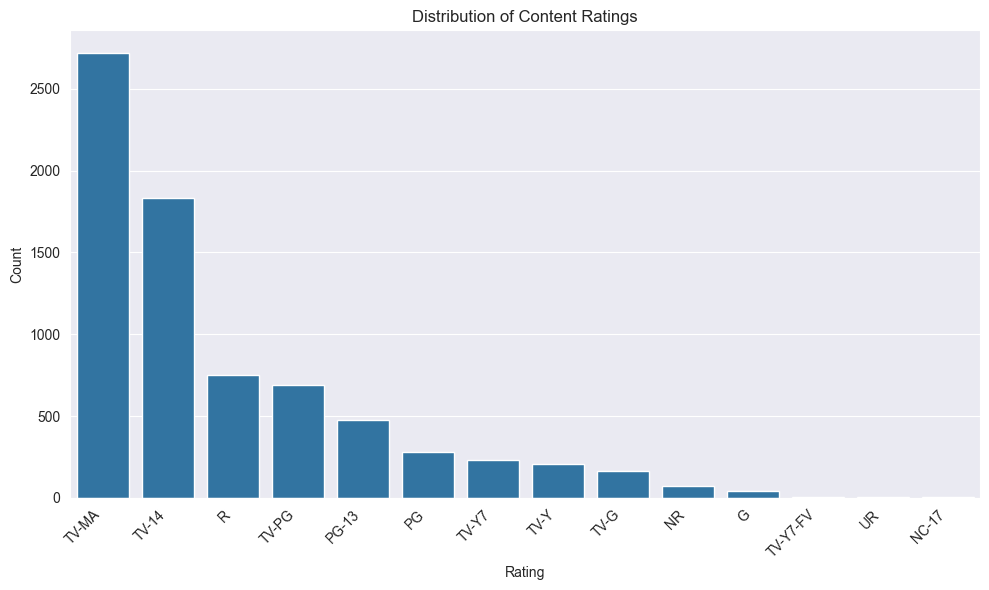

In [14]:
# Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x="rating", data=netflix_data_pdf, order=netflix_data_pdf["rating"].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

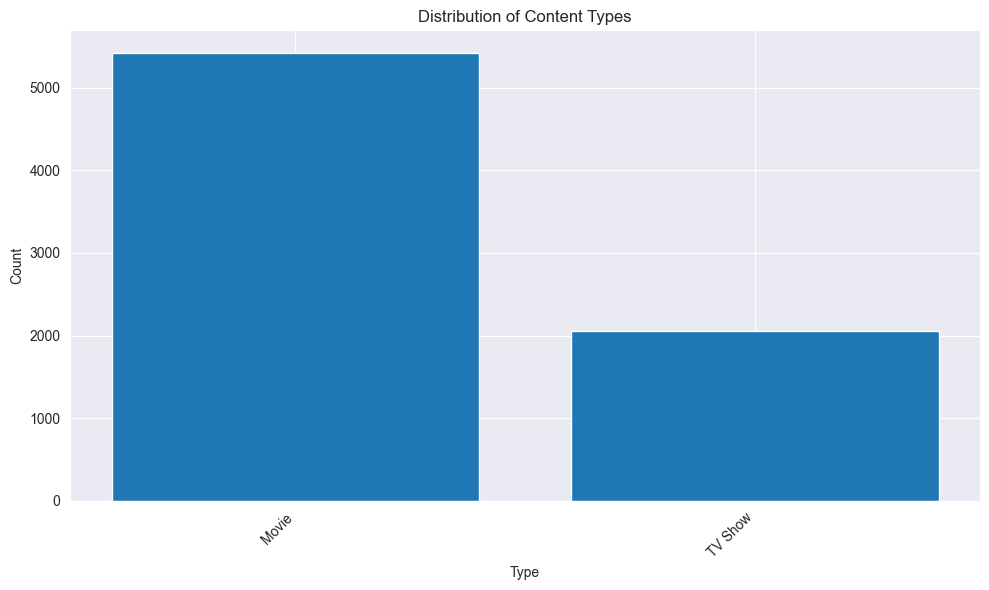

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(netflix_data_pdf['type'].value_counts().index, netflix_data_pdf['type'].value_counts().values)
plt.title("Distribution of Content Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

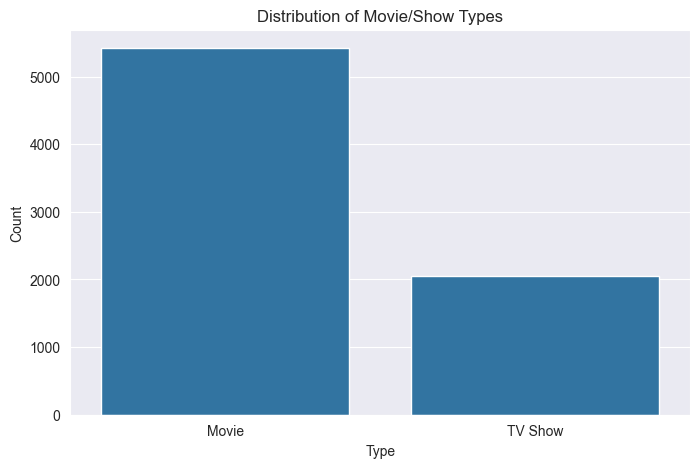

In [16]:
# Seaborn
plt.figure(figsize=(8, 5))
sns.countplot(x="type", data=netflix_data_pdf)
plt.title("Distribution of Movie/Show Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

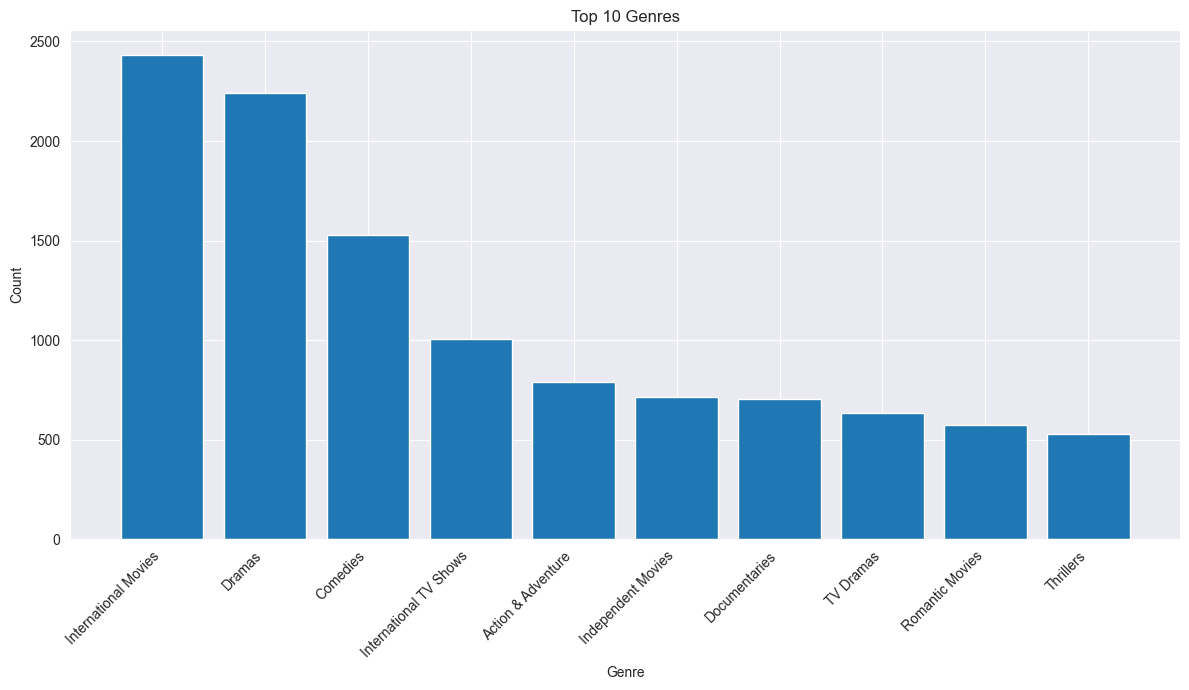

In [17]:
# 3. Genre Distribution (needs some extra steps)

# Explode the 'genres' column (convert lists to multiple rows)
genres_exploded = netflix_data_pdf.explode("genres")

# Count occurrences of each genre
genre_counts = genres_exploded["genres"].value_counts()

# Matplotlib (for top N genres)
top_n = 10
plt.figure(figsize=(12, 7))
plt.bar(genre_counts.index[:top_n], genre_counts.values[:top_n])
plt.title(f"Top {top_n} Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

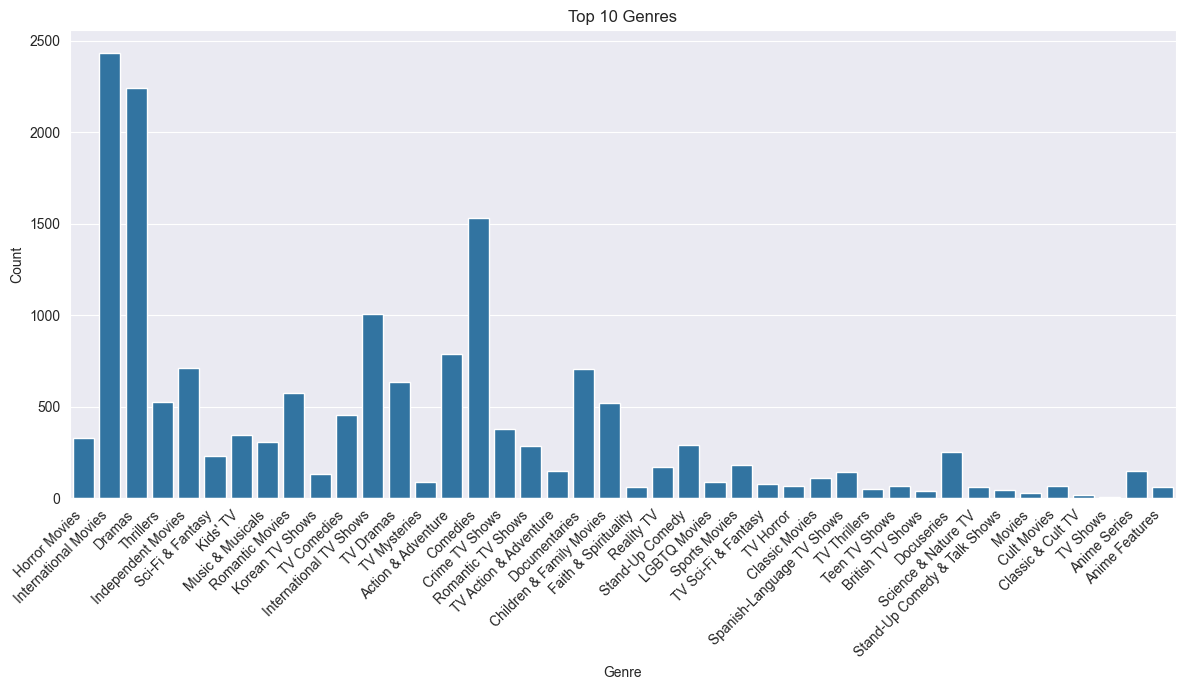

In [18]:
# Seaborn (for top N genres)
plt.figure(figsize=(12, 7))
sns.countplot(x="genres", data=genres_exploded)
plt.title(f"Top {top_n} Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [19]:
genres_exploded['genres'].value_counts().head(5)

genres
International Movies      2434
Dramas                    2242
Comedies                  1529
International TV Shows    1006
Action & Adventure         791
Name: count, dtype: int64

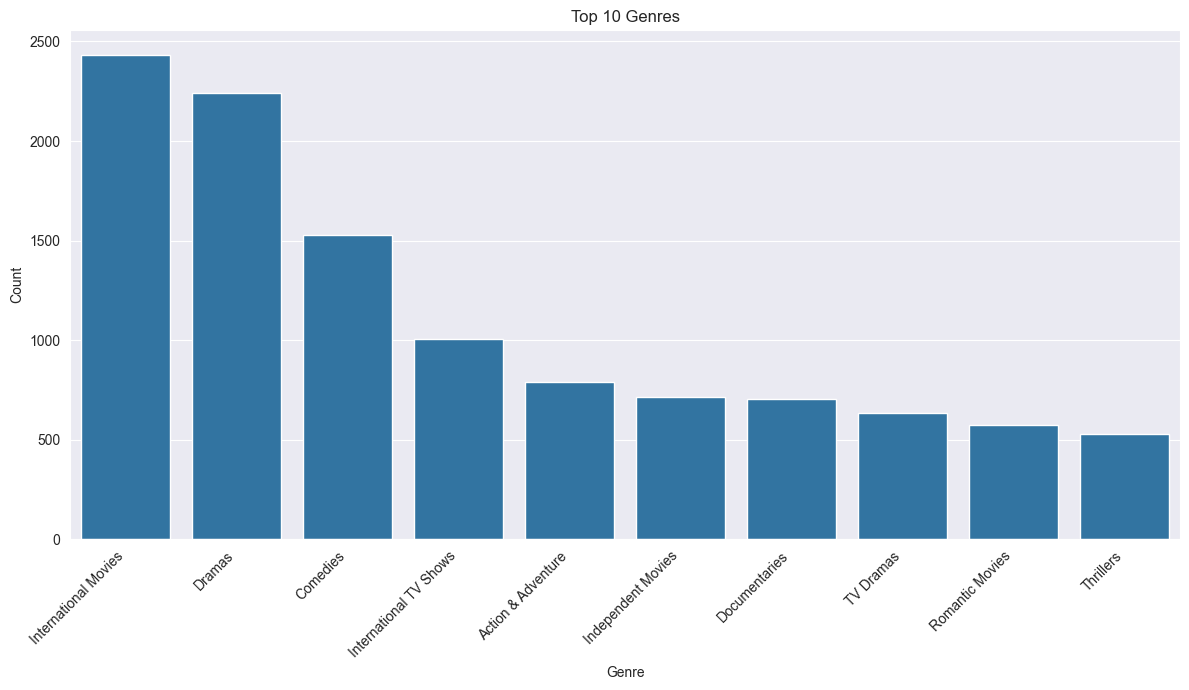

In [20]:
# Get top N genres (ensure unique values)
top_genres = genres_exploded['genres'].value_counts().head(top_n).index

# Filter the DataFrame to include only the top N genres
filtered_data = genres_exploded[genres_exploded['genres'].isin(top_genres)]

# Seaborn plot with ordered bars
plt.figure(figsize=(12, 7))
sns.countplot(x="genres",
             data=filtered_data,
             order=top_genres)  # Add order parameter
plt.title(f"Top {top_n} Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

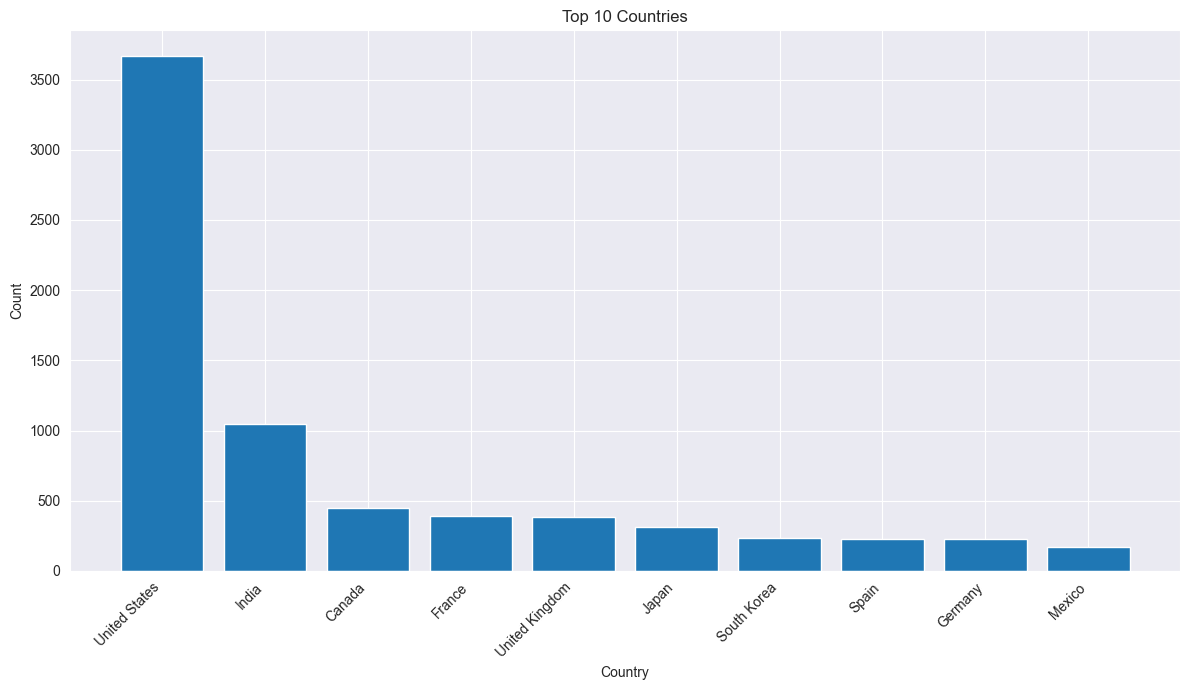

In [21]:
# 4. Country Distribution (same approach as genres)

countries_exploded = netflix_data_pdf.explode("released_countries")
country_counts = countries_exploded["released_countries"].value_counts()

# ... (Matplotlib and Seaborn code similar to genres)

plt.figure(figsize=(12, 7))
plt.bar(country_counts.index[:top_n], country_counts.values[:top_n])
plt.title(f"Top {top_n} Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

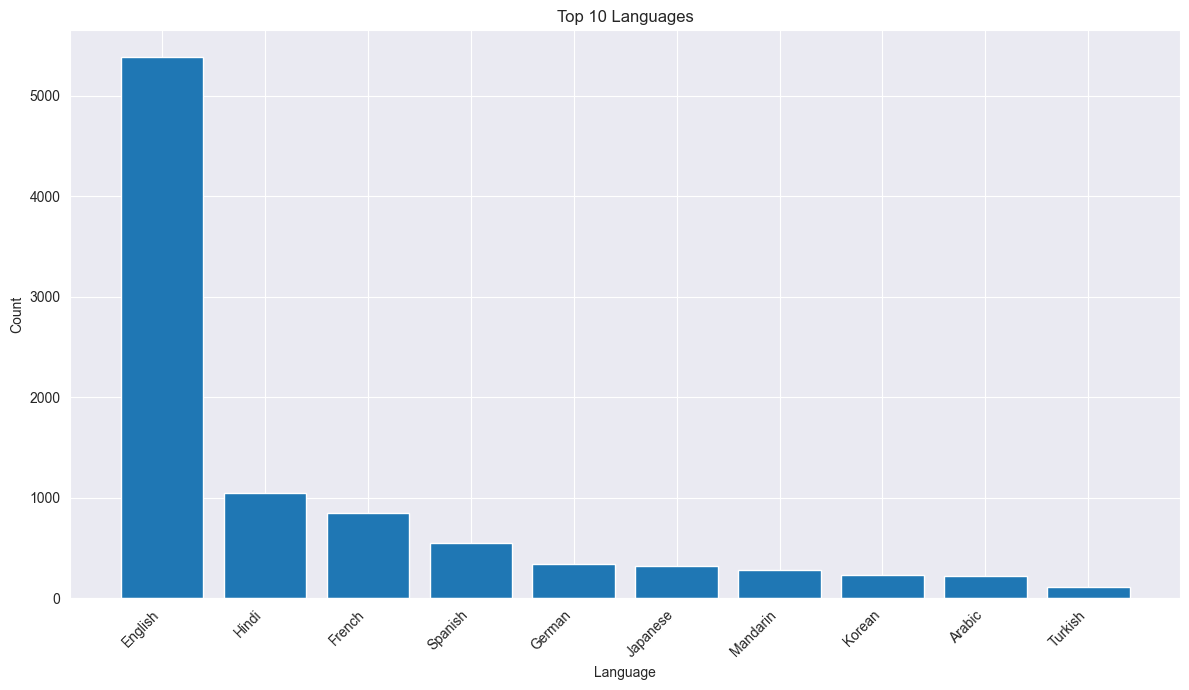

In [22]:
# 5. Language Distribution (same approach as countries)

languages_exploded = netflix_data_pdf.explode("released_languages")
language_counts = languages_exploded["released_languages"].value_counts()

# ... (Matplotlib and Seaborn code similar to genres)
plt.figure(figsize=(12, 7))
plt.bar(language_counts.index[:top_n], language_counts.values[:top_n])
plt.title(f"Top {top_n} Languages")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# **Bivariate Analysis (Exploring Relationships between Pairs of Features)**

## **Numerical vs. Numerical:**

### **release_year vs. movie_duration**

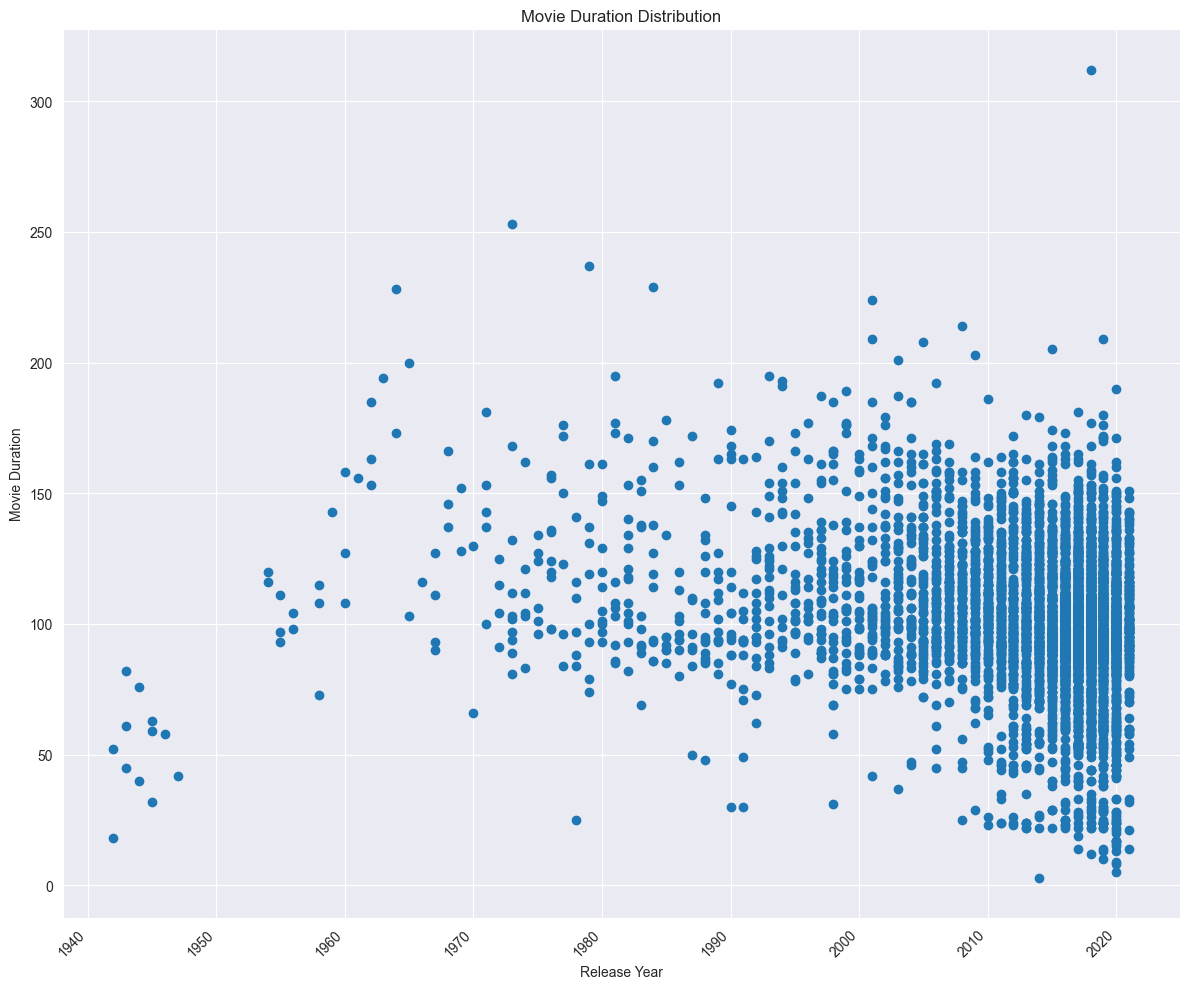

In [23]:
plt.figure(figsize=(12, 10))
plt.scatter(netflix_data_pdf["release_year"], netflix_data_pdf["movie_duration"])
plt.xlabel("Release Year")
plt.ylabel("Movie Duration")
plt.title("Movie Duration Distribution")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

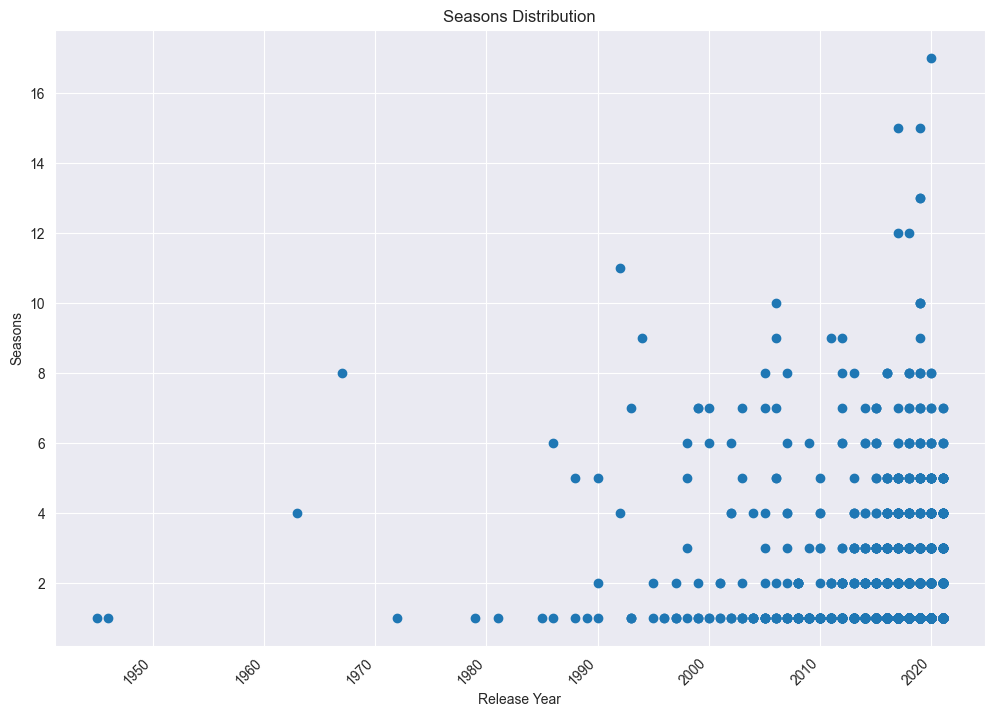

In [24]:
plt.figure(figsize=(12, 8))
plt.scatter(netflix_data_pdf["release_year"], netflix_data_pdf["seasons"])
plt.xlabel("Release Year")
plt.ylabel("Seasons")
plt.title("Seasons Distribution")
plt.xticks(rotation=45, ha="right")
plt.show()

## **Categorical vs. Categorical**

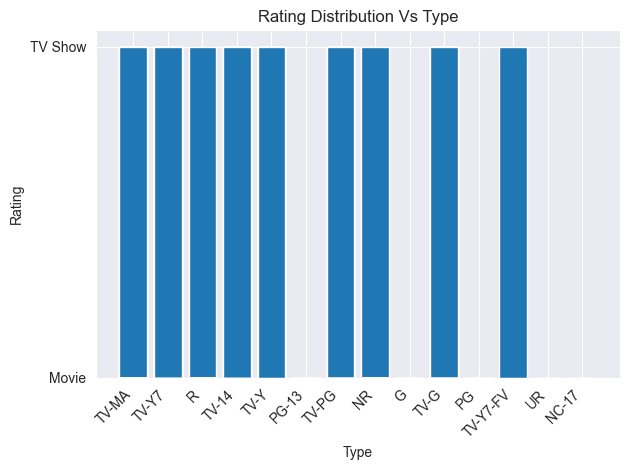

In [25]:
plt.bar(netflix_data_pdf['rating'], netflix_data_pdf['type'])
plt.xlabel("Type")
plt.ylabel("Rating")
plt.title("Rating Distribution Vs Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

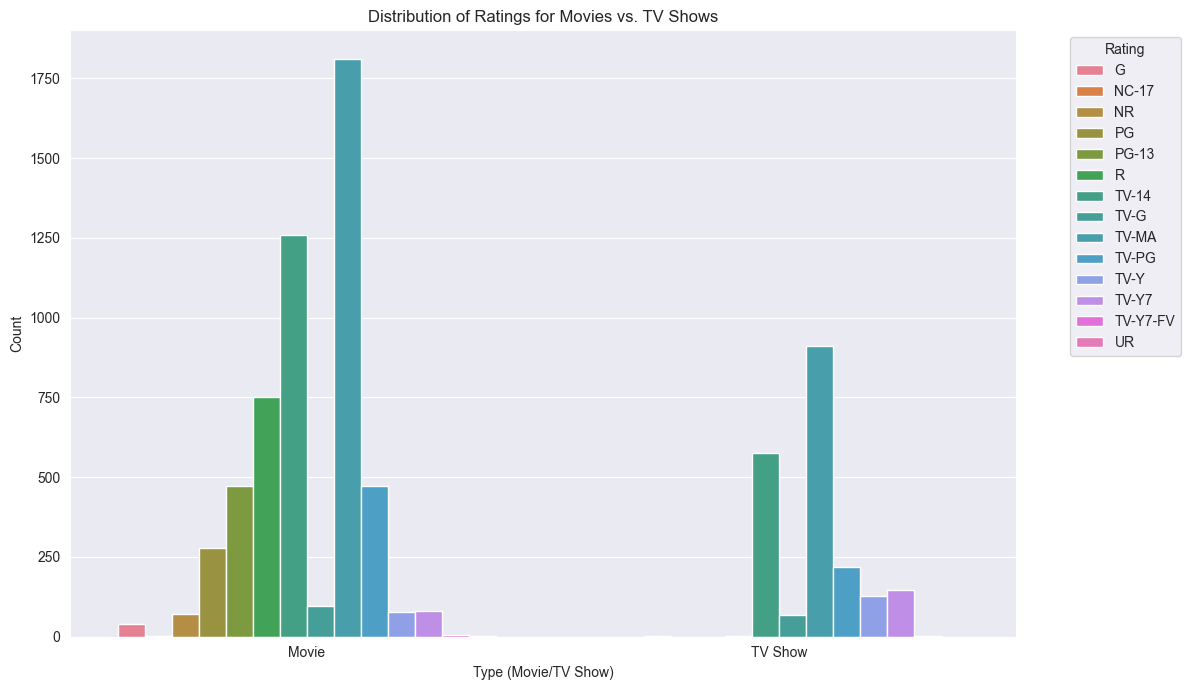

In [26]:
# Create a long-form DataFrame for Seaborn
long_df = netflix_data_pdf.groupby(['type', 'rating']).size().reset_index(name='count')

# Plot using Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='type', y='count', hue='rating', data=long_df)

# Add labels and title
plt.title('Distribution of Ratings for Movies vs. TV Shows')
plt.xlabel('Type (Movie/TV Show)')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Show the plot
plt.tight_layout()
plt.show()

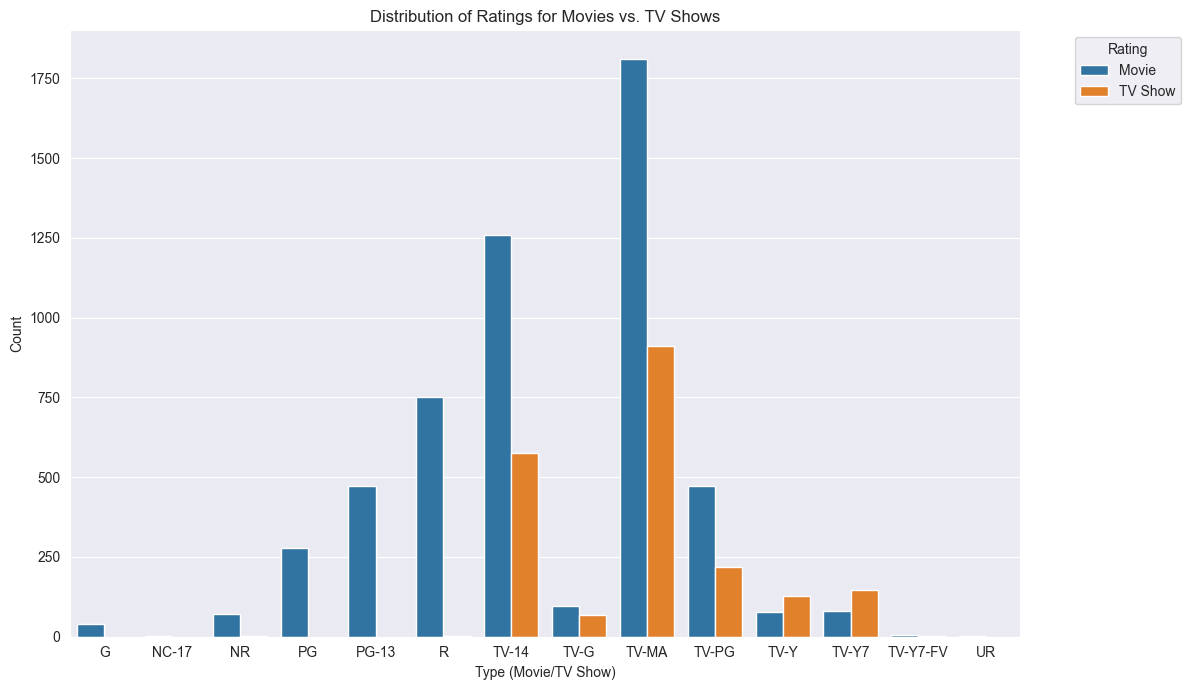

In [27]:
# Create a long-form DataFrame for Seaborn
long_df = netflix_data_pdf.groupby(['type', 'rating']).size().reset_index(name='count')

# Plot using Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='rating', y='count', hue='type', data=long_df)

# Add labels and title
plt.title('Distribution of Ratings for Movies vs. TV Shows')
plt.xlabel('Type (Movie/TV Show)')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Show the plot
plt.tight_layout()
plt.show()

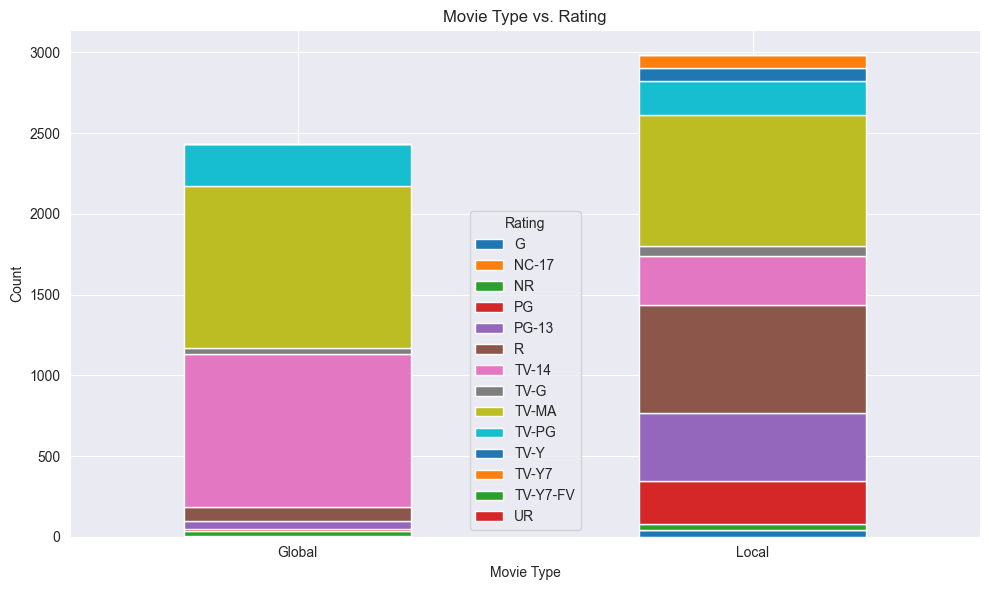

In [28]:
# Create a contingency table (cross-tabulation) of movie_type and rating
contingency_table = pd.crosstab(netflix_data_pdf["movie_type"], netflix_data_pdf["rating"])

# Matplotlib (Stacked Bar Chart)

# Plot the stacked bar chart
contingency_table.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Movie Type vs. Rating")
plt.xlabel("Movie Type")
plt.ylabel("Count")
plt.xticks(rotation=0)  # No rotation for movie type labels
plt.legend(title="Rating")
plt.tight_layout()
plt.show()


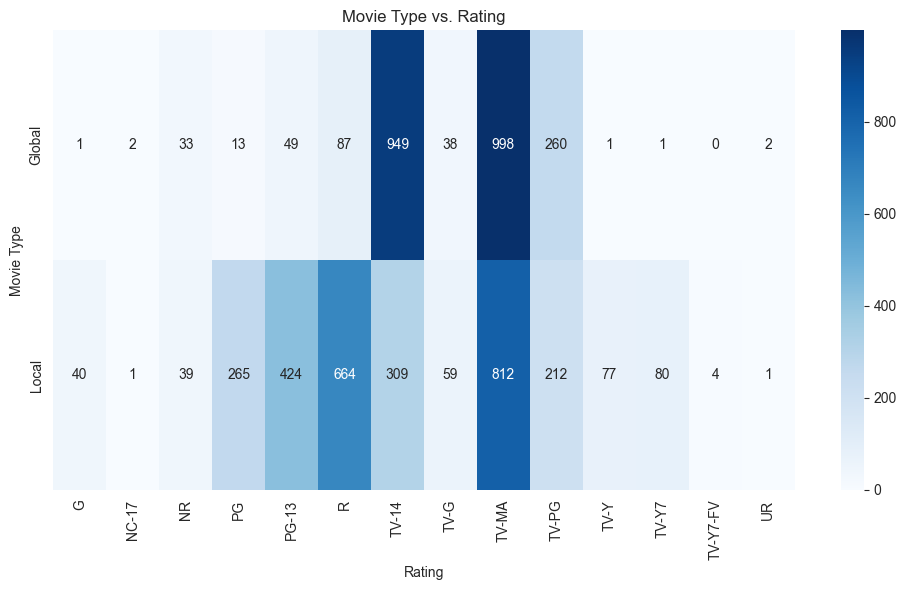

In [29]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Movie Type vs. Rating")
plt.xlabel("Rating")
plt.ylabel("Movie Type")
plt.tight_layout()
plt.show()

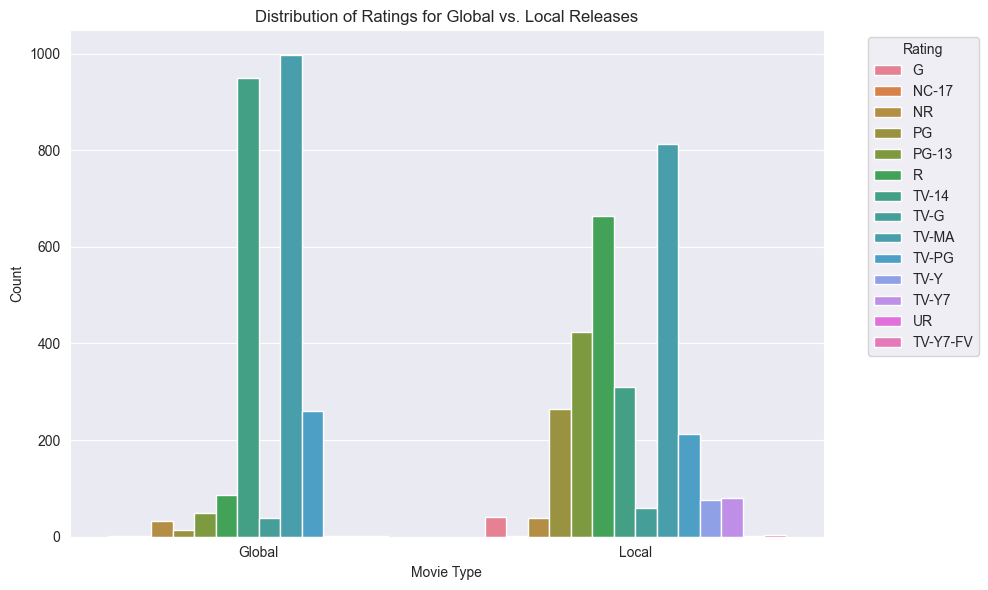

In [30]:
# Create a long-form DataFrame for Seaborn
long_df_type = netflix_data_pdf.groupby(['movie_type', 'rating']).size().reset_index(name='count')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='movie_type', y='count', hue='rating', data=long_df_type)

# Add labels and title
plt.title('Distribution of Ratings for Global vs. Local Releases')
plt.xlabel('Movie Type')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Show the plot
plt.tight_layout()
plt.show()

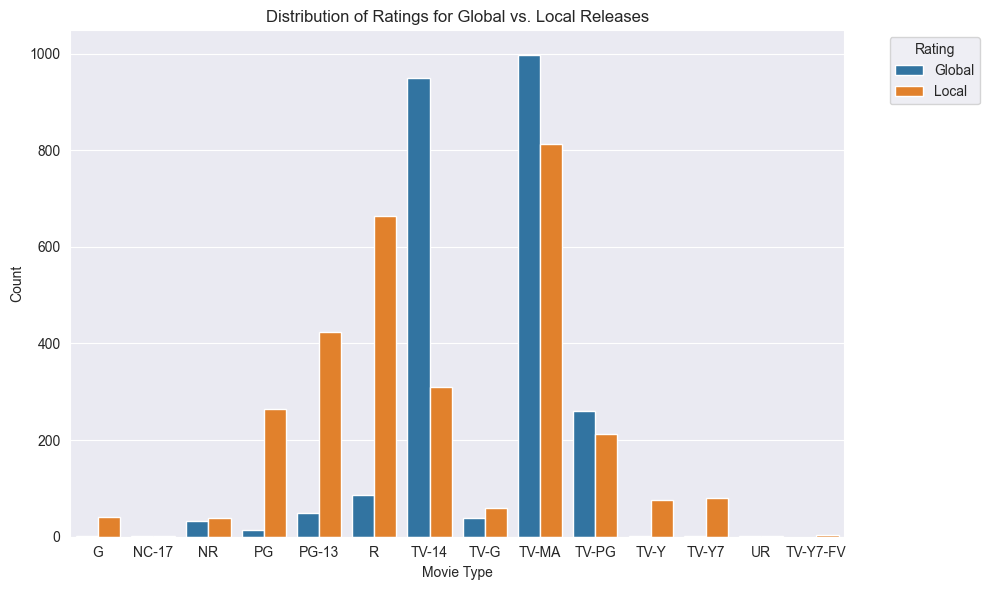

In [31]:
import seaborn as sns

# Create a long-form DataFrame for Seaborn
long_df_type = netflix_data_pdf.groupby(['movie_type', 'rating']).size().reset_index(name='count')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='count', hue='movie_type', data=long_df_type)

# Add labels and title
plt.title('Distribution of Ratings for Global vs. Local Releases')
plt.xlabel('Movie Type')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Show the plot
plt.tight_layout()
plt.show()

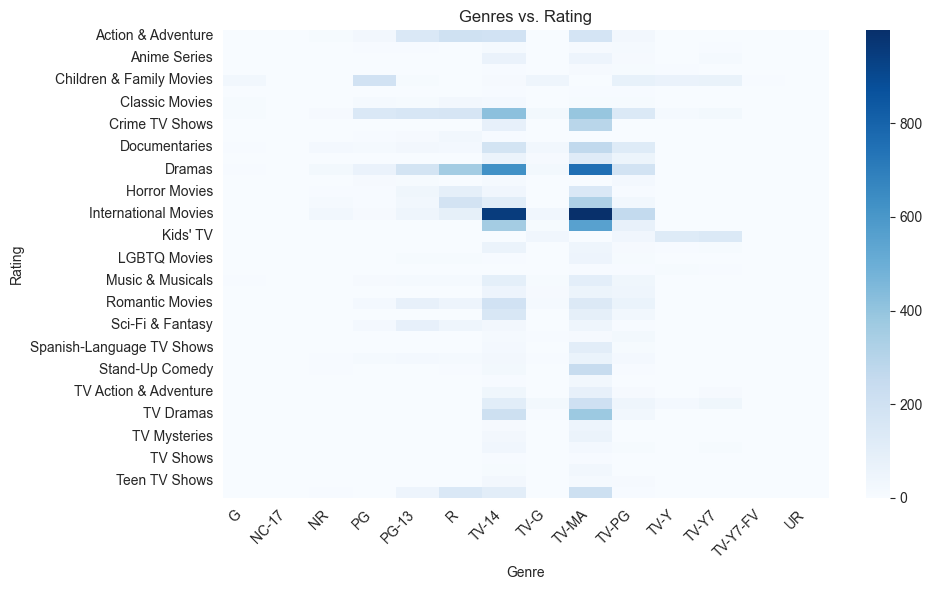

In [32]:
genres_rating_table = pd.crosstab(genres_exploded["genres"], genres_exploded["rating"])

plt.figure(figsize=(10, 6))
sns.heatmap(genres_rating_table, cmap="Blues")
plt.title('Genres vs. Rating')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

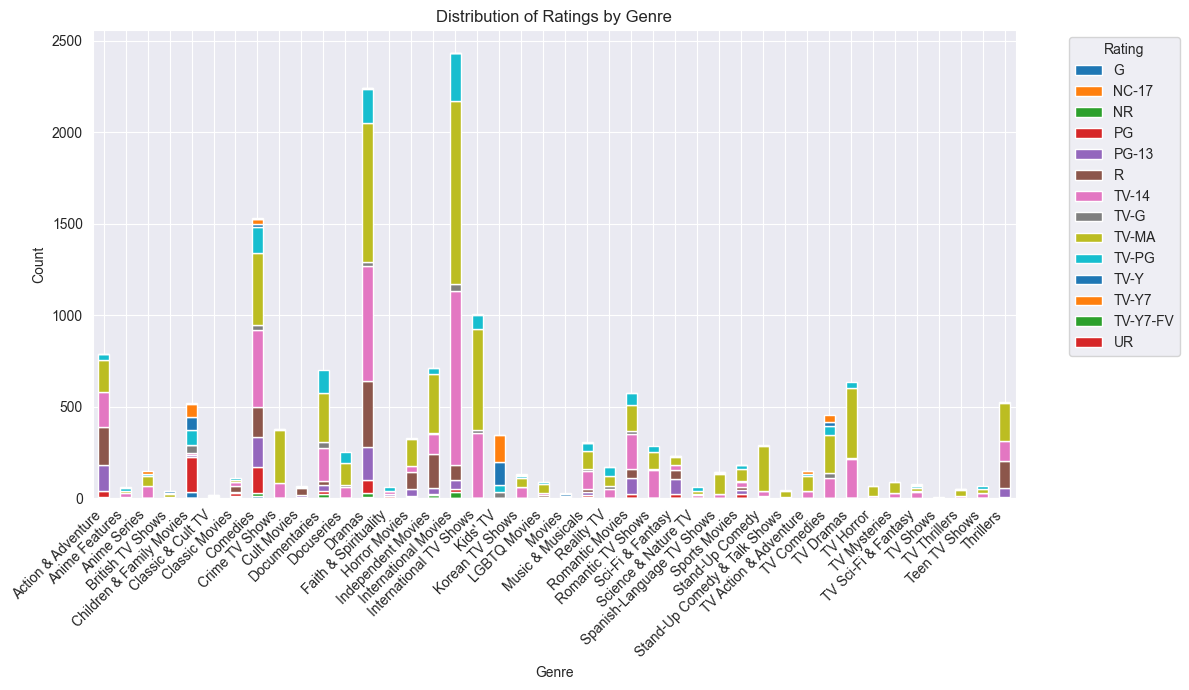

In [33]:
# Plot the stacked bar chart
genres_rating_table.plot(kind='bar', stacked=True, figsize=(12, 7))

# Add labels and title
plt.title('Distribution of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Show the plot
plt.tight_layout()
plt.show()

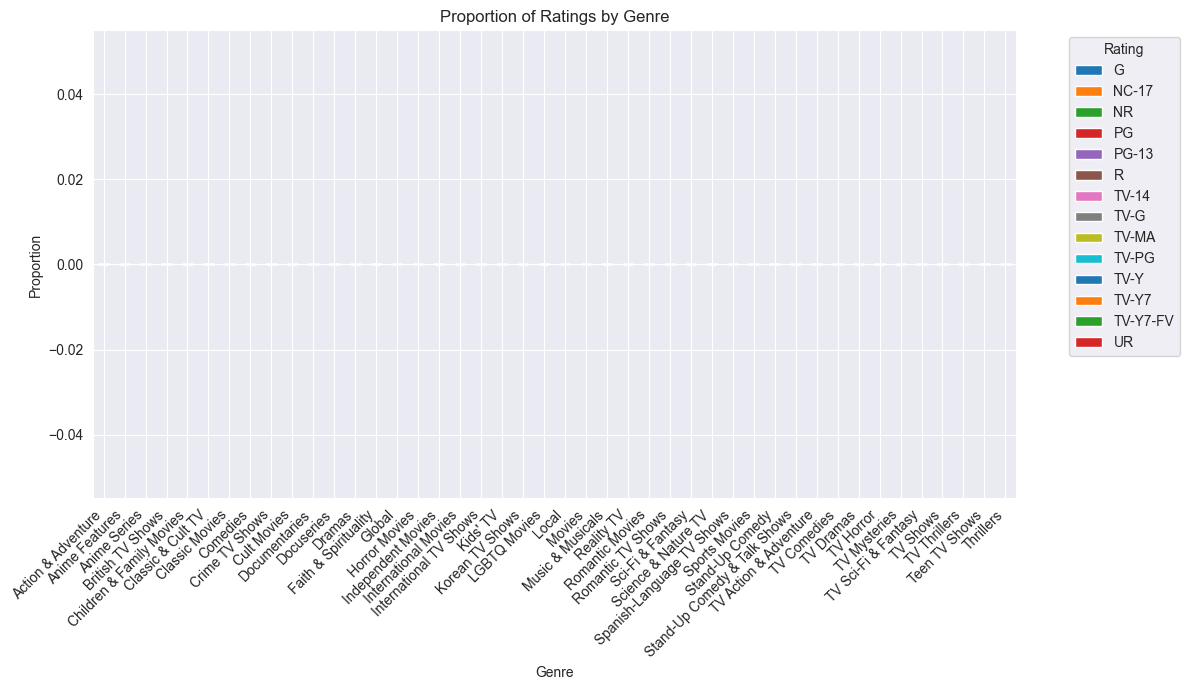

In [34]:
# Normalize the contingency table by row (genre)
normalized_table = genres_rating_table.div(contingency_table.sum(axis=1), axis=0)

# Plot the normalized stacked bar chart
normalized_table.plot(kind='bar', stacked=True, figsize=(12, 7))

# Add labels and title
plt.title('Proportion of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Show the plot
plt.tight_layout()
plt.show()

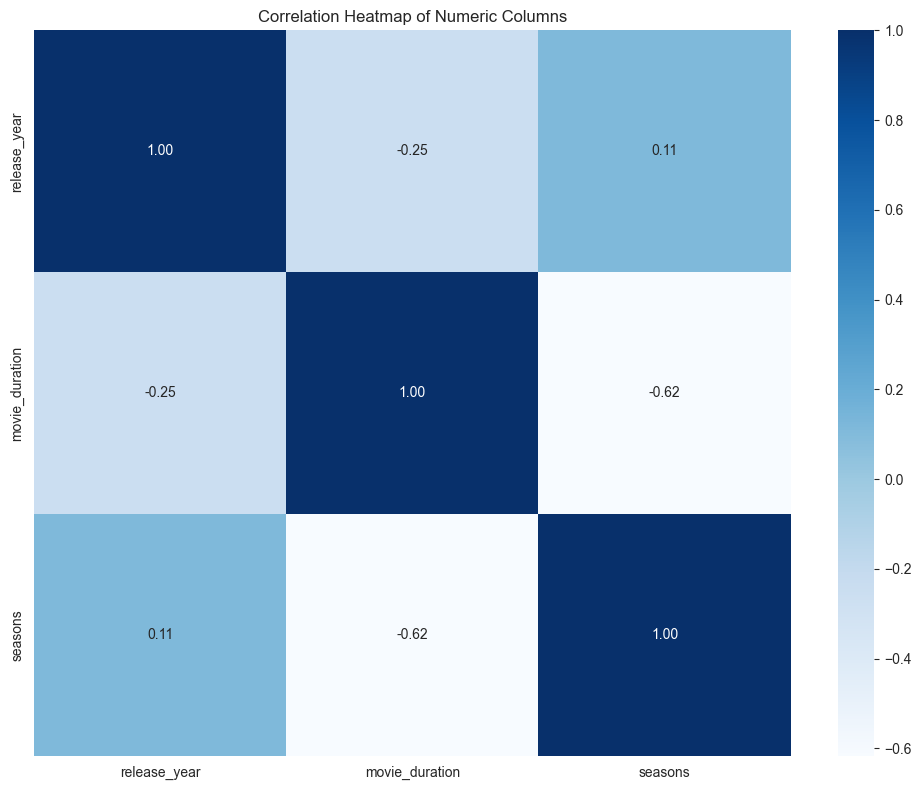

In [35]:

# Select only numeric columns for correlation
numeric_columns = netflix_data_pdf.select_dtypes(include=['float64', 'int32'])

# Check for missing values and handle them (e.g., fill with 0 or drop)
numeric_columns = numeric_columns.fillna(0)  # Fill missing values with 0

# Calculate the correlation matrix
net_corr_mx = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(net_corr_mx, annot=True, cmap='Blues', fmt='.2f')

# Add title and labels
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

In [36]:
sns.pairplot(netflix_data_pdf)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()